In [331]:
import scipy.io
import os
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import numpy as np
import cv2
from tqdm.notebook import tqdm
import pandas as pd 

plt.rcParams['image.cmap'] = 'viridis'


In [332]:
image_paths = np.sort(np.array(os.listdir("raw_images")))
seg_paths = np.sort(np.array(os.listdir("segmented")))

In [333]:
mat = scipy.io.loadmat("raw_images/" + image_paths[10])
seg_np = scipy.io.loadmat("segmented/" + seg_paths[10])

In [334]:
image = (mat["embryo"])
segmented = seg_np["membSeg"]

In [335]:
segmented.shape

(205, 285, 134)

In [336]:
image.shape

(256, 356, 70)

In [337]:
def show_n_channel_image(n_channels, image):
    for i in range(n_channels):
        clear_output(wait=True)
        plt.imshow(image[:,:,i])
        plt.show()

In [338]:
np.arange(0,134,70)

array([ 0, 70])

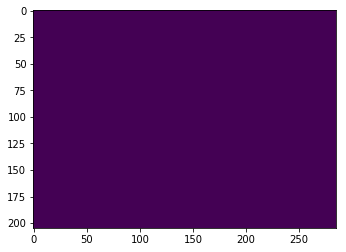

In [339]:
show_n_channel_image(134, segmented)

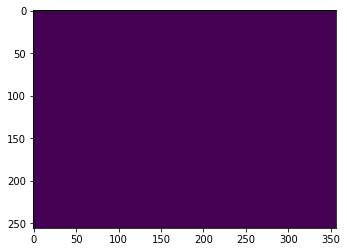

In [340]:
show_n_channel_image(70, image)

In [341]:
segmented.shape

(205, 285, 134)

In [342]:
seg_mv = np.moveaxis(segmented, 2,0)

In [343]:
def partition(lst, n):
    increment = len(lst) / float(n)
    last = 0
    i = 1
    results = []
    while last < len(lst):
        idx = int(round(increment * i))
        results.append(lst[last:idx])
        last = idx
        i += 1
    return results

In [344]:
slices = partition(seg_mv, 70)

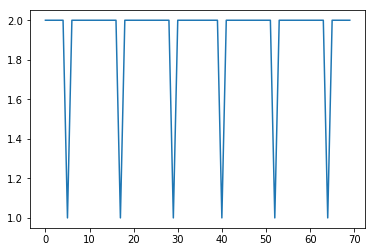

In [345]:
plt.plot([len(i) for i in slices])

In [346]:
labels = slices[-20]
image = image

In [347]:
labels.shape

(2, 205, 285)

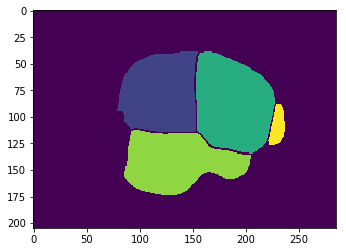

In [348]:
plt.imshow(labels[0])

In [358]:
def show_images(img_list):
    len_x = len(img_list)
    
    fig, ax = plt.subplots(1,len_x, figsize = (10,3))
    for i in range(len(img_list)):
        ax.flat[i].imshow(img_list[i])

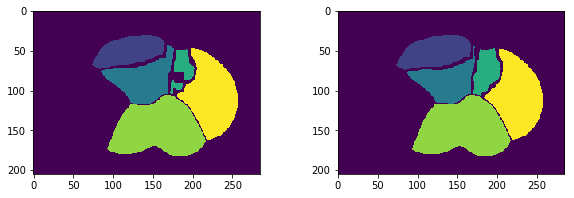

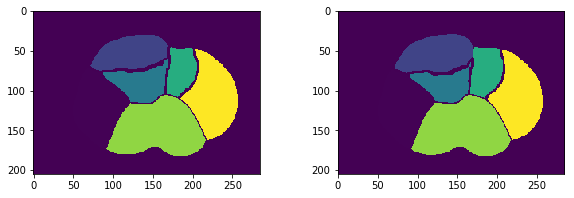

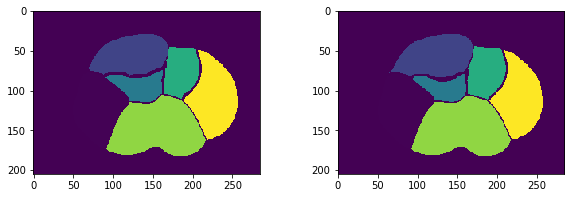

In [359]:
for i in range(30,33,1):
    
    show_images(slices[i])

In [361]:
def prepare_segmentation_data(image_foldername, seg_foldername, save_folder = "training_data"):
    metadata = []
    
    if os.path.isdir(save_folder) is not True:
        os.mkdir(save_folder)
        os.mkdir(save_folder + "/" + "masks")
        os.mkdir(save_folder + "/" + "images")
        
        
    image_paths = np.sort(np.array(os.listdir(image_foldername)))
    seg_paths = np.sort(np.array(os.listdir(seg_foldername)))
    
    for i in tqdm(range(len(image_paths))):
        img_mat = scipy.io.loadmat("raw_images/" + image_paths[i])
        seg_mat = scipy.io.loadmat("segmented/" + seg_paths[i])

        images = mat["embryo"]
        segs = seg_mat["membSeg"]
        
        images_mv = np.moveaxis(images, 2,0)
        seg_mv = np.moveaxis(segmented, 2,0)
        
        slices = partition(seg_mv, 70)
        
        for j in range(9,58,1):  ## exclude black or mostly black images 
            image_name = "real_" + str(i)+"_"+str(j)+ ".jpg"

            image = images_mv[j]
            masks = slices[j]
            
            cv2.imwrite(save_folder + "/images/" + image_name, image)
#             print(save_folder + "/images/" + image_name)
            
            for k in range(len(masks)):
                mask_name = "mask_" + str(i) + "_" + str(j) + "_" + str(k) + ".jpg"
                cv2.imwrite(save_folder + "/masks/" + mask_name, masks[k])
                metadata.append([save_folder + "/images/" + image_name, save_folder + "/masks/" + mask_name])
    return metadata
                
           
        

    

In [362]:
metadata = prepare_segmentation_data("raw_images", "segmented")

In [329]:
df = pd.DataFrame(metadata, columns = ["image", "mask"])

In [330]:
df.head()

,image,mask
0,training_data/images/real_0_9.jpg,training_data/masks/mask_0_9_0.jpg
1,training_data/images/real_0_9.jpg,training_data/masks/mask_0_9_1.jpg
2,training_data/images/real_0_10.jpg,training_data/masks/mask_0_10_0.jpg
3,training_data/images/real_0_10.jpg,training_data/masks/mask_0_10_1.jpg
4,training_data/images/real_0_11.jpg,training_data/masks/mask_0_11_0.jpg


In [373]:
df.to_csv("metadata.csv", index = False )